## Data Review

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import tensorflow as tf
import copy, math

In [6]:
# Import the pandas library
import pandas as pd

# Define the column names for the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Read the data from a CSV file and store it in a DataFrame
df = pd.read_csv(
    "/Users/mohamadrezasalehi/Journey/Kaggle trainings/Boston Housing/housing.csv",
    header=None,  # Indicates that there is no header row in the CSV file
    delimiter=r"\s+",  # Specifies the delimiter as one or more whitespaces
    names=column_names  # Assigns the defined column names to the DataFrame
)

# Print the first 5 rows of the DataFrame
print(df.head(5))

# CRIM - Per capita crime rate by town

# ZN - Proportion of residential land zoned for lots over 25,000 sq.ft.

# INDUS - Proportion of non-retail business acres per town.

# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

# NOX - Nitric oxides concentration (parts per 10 million)

# RM - Average number of rooms per dwelling

# AGE - Proportion of owner-occupied units built prior to 1940

# DIS - Weighted distances to five Boston employment centres

# RAD - Index of accessibility to radial highways

# TAX - Full-value property-tax rate per $10,000

# PTRATIO - Pupil-teacher ratio by town

# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

# LSTAT - Percentage of lower status of the population

# MEDV - Median value of owner-occupied homes in $1000's



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
df.head(n = 10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [9]:
df.shape

(506, 14)

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Data Visualization

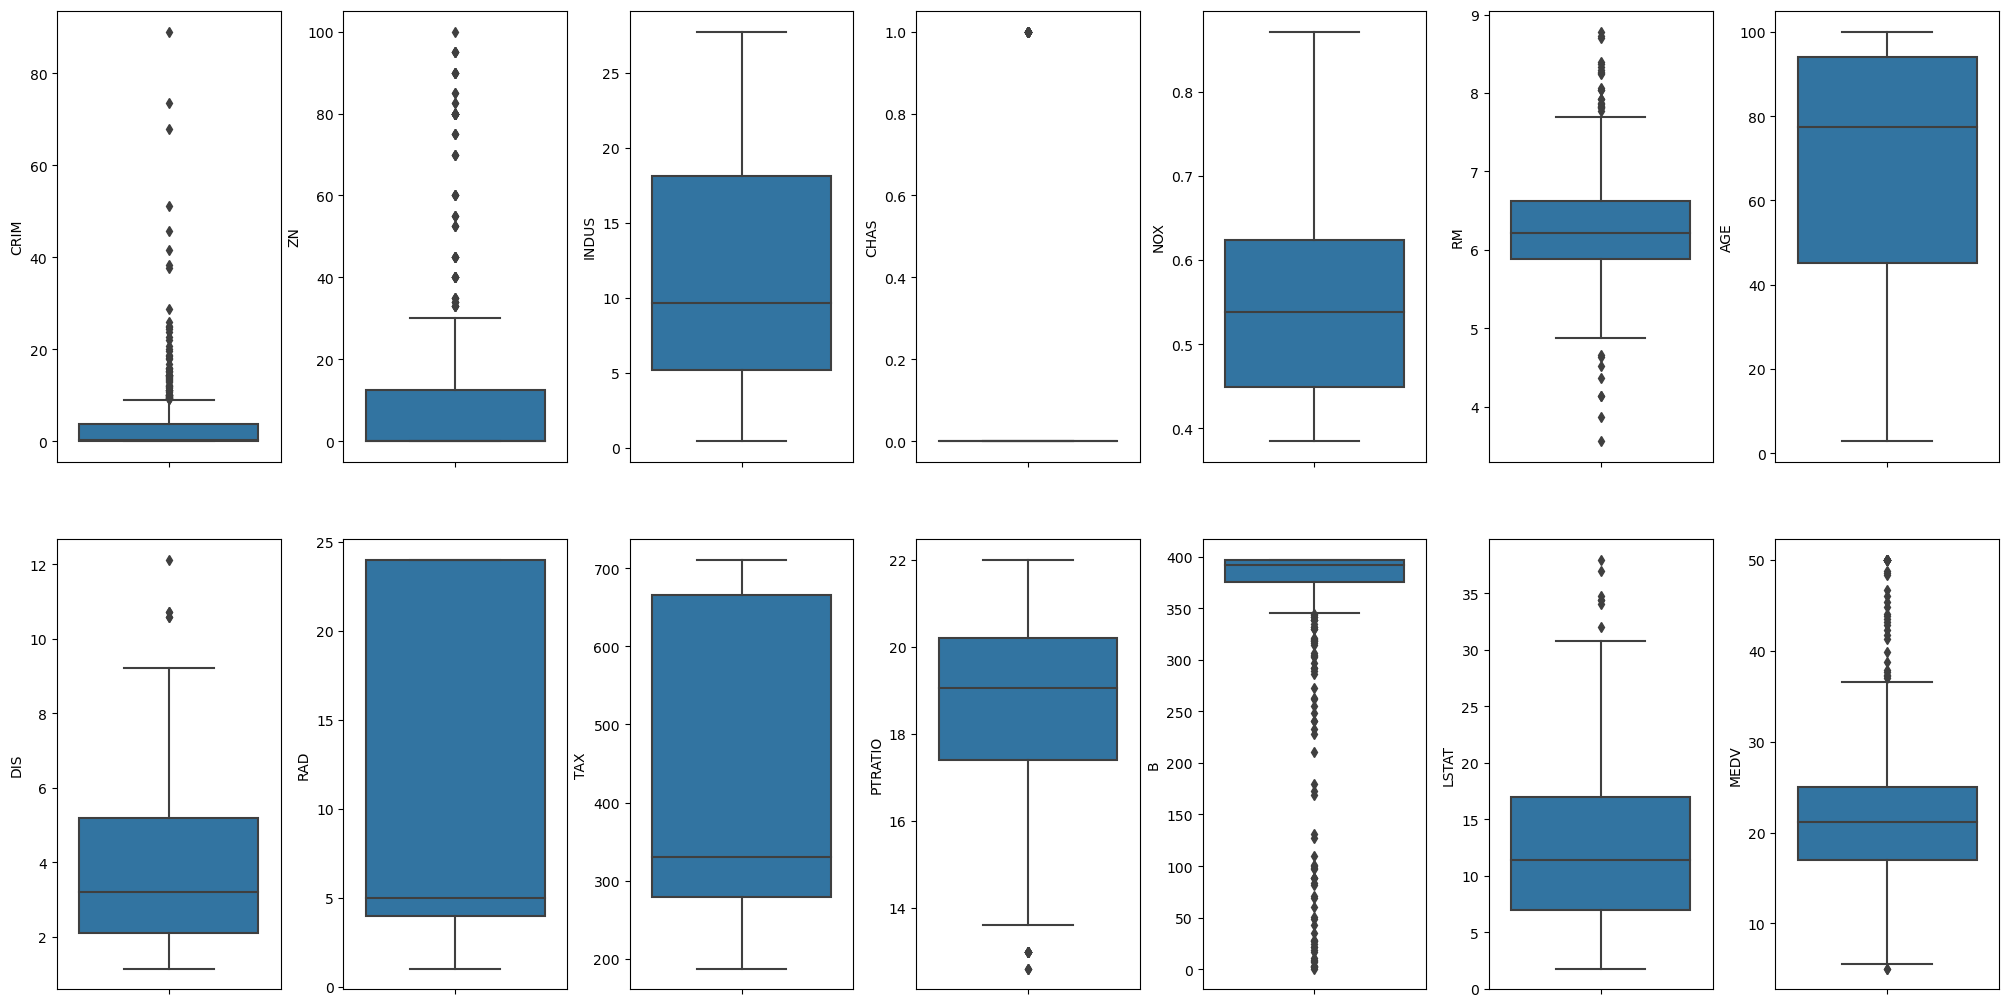

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

/var/folders/gc/dm7c6wn54kv89c8pyshdv6g80000gn/T/ipykernel_1617/4050624376.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/var/folders/gc/dm7c6wn54kv89c8pyshdv6g80000gn/T/ipykernel_1617/4050624376.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/var/f

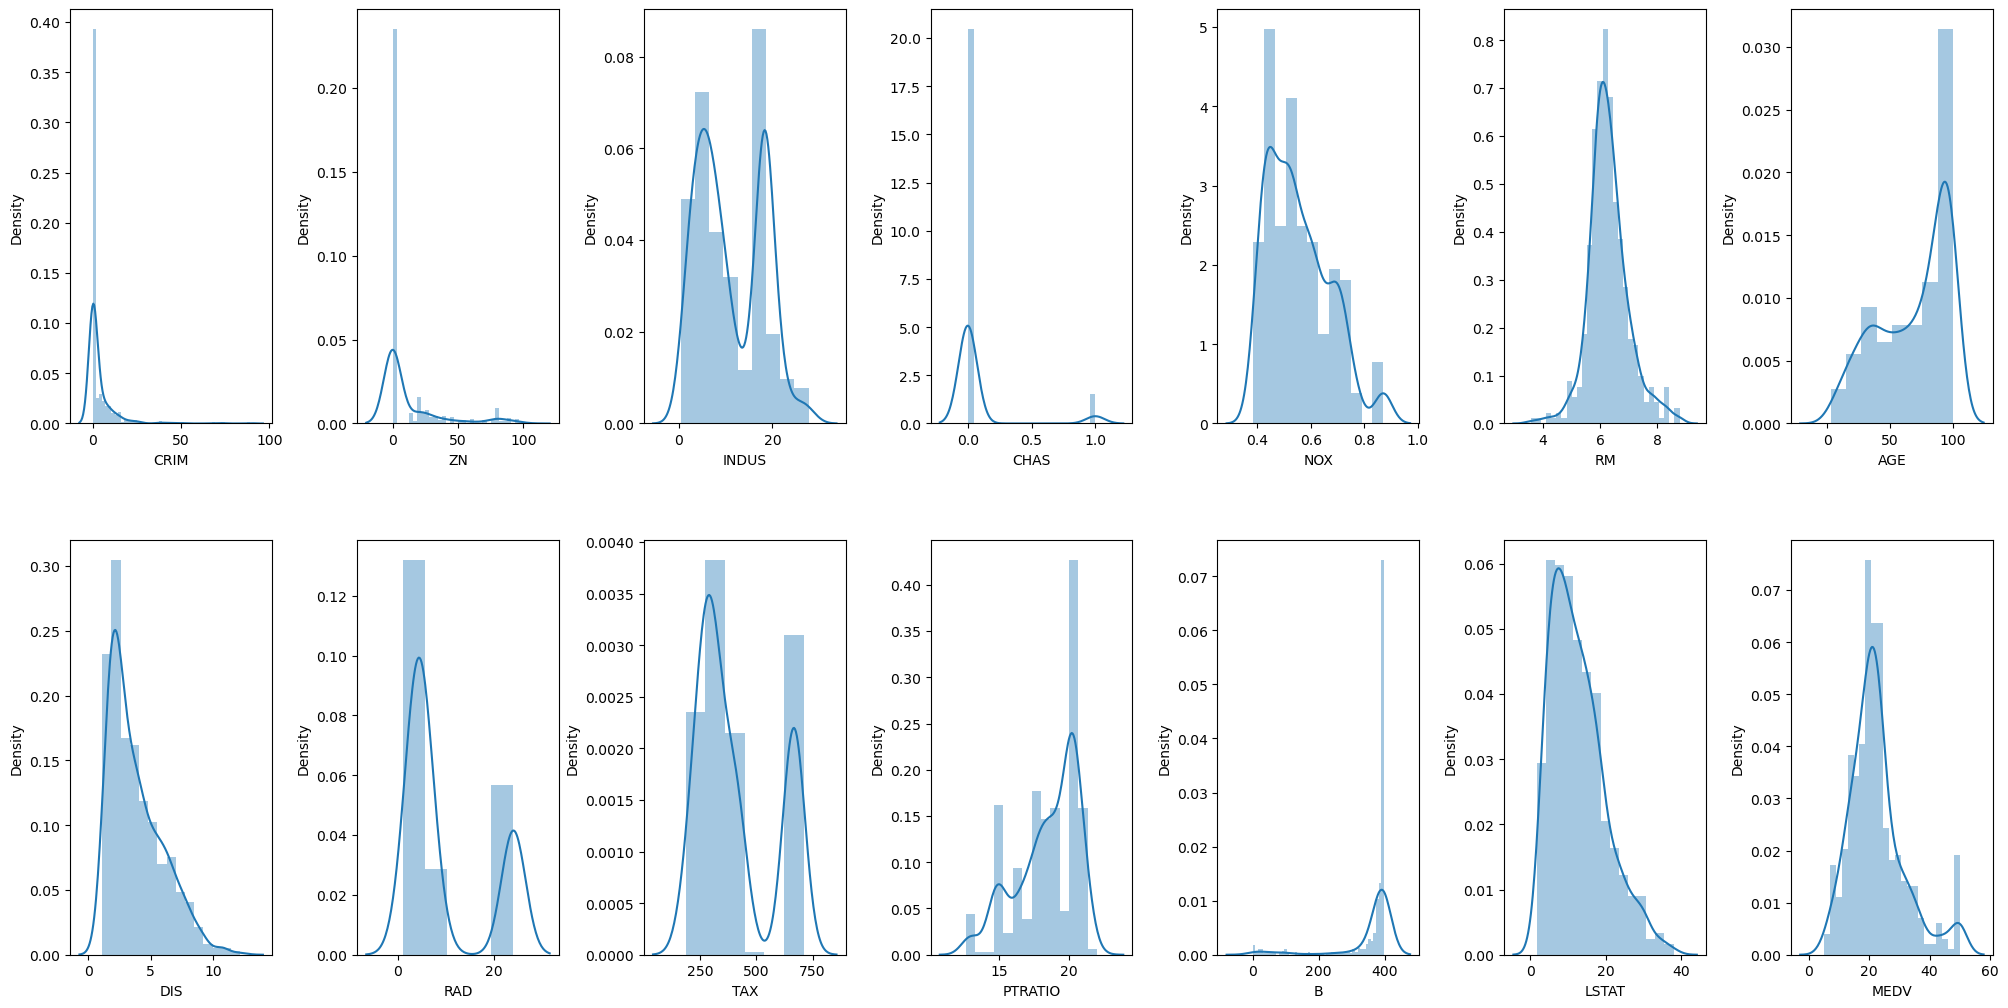

In [30]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

To calculate the percentage of outliers in specific columns (CRIM, ZN, RM, DIS, B, MEDV), we can use a more concise and generalized approach using a loop.

In [31]:
# Iterate through the columns (features) of the 'data' DataFrame
for k, v in df.items():
    # Calculate the first quartile (Q1) and third quartile (Q3)
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    irq = q3 - q1
    
    # Filter values that are considered outliers based on IQR
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    
    # Calculate the percentage of outliers in the current column
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    
    # Print the percentage of outliers for the current column
    print("Column %s outliers = %.2f%%" % (k, perc))


Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


Let's create a pairwise correlation plot for the given data.

<Axes: >

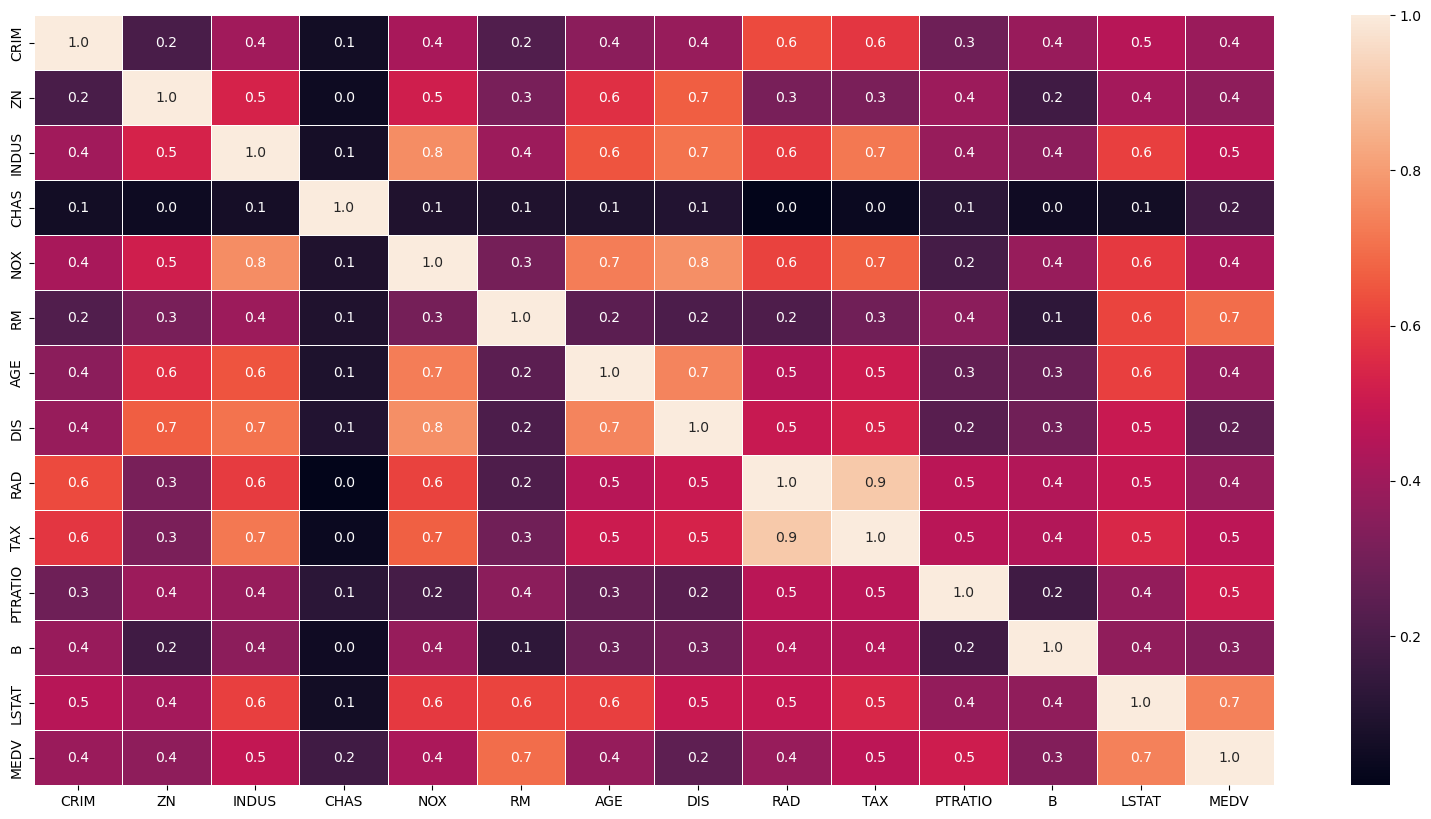

In [32]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True, linewidths=.5, fmt= '.1f')

## Skewness in the data

Since the number of attributes is not very large, and there are no highly correlated variables, there is no need to remove any attributes from the dataset.

Given that TAX and RAD are correlated features, and the columns LSTAT, INDUS, RM, TAX, NOX, and PTRATIO have a correlation score above 0.5 with MEDV, it's a strong indication that we should consider these columns as predictors. Let's create plots to visualize these columns against MEDV.


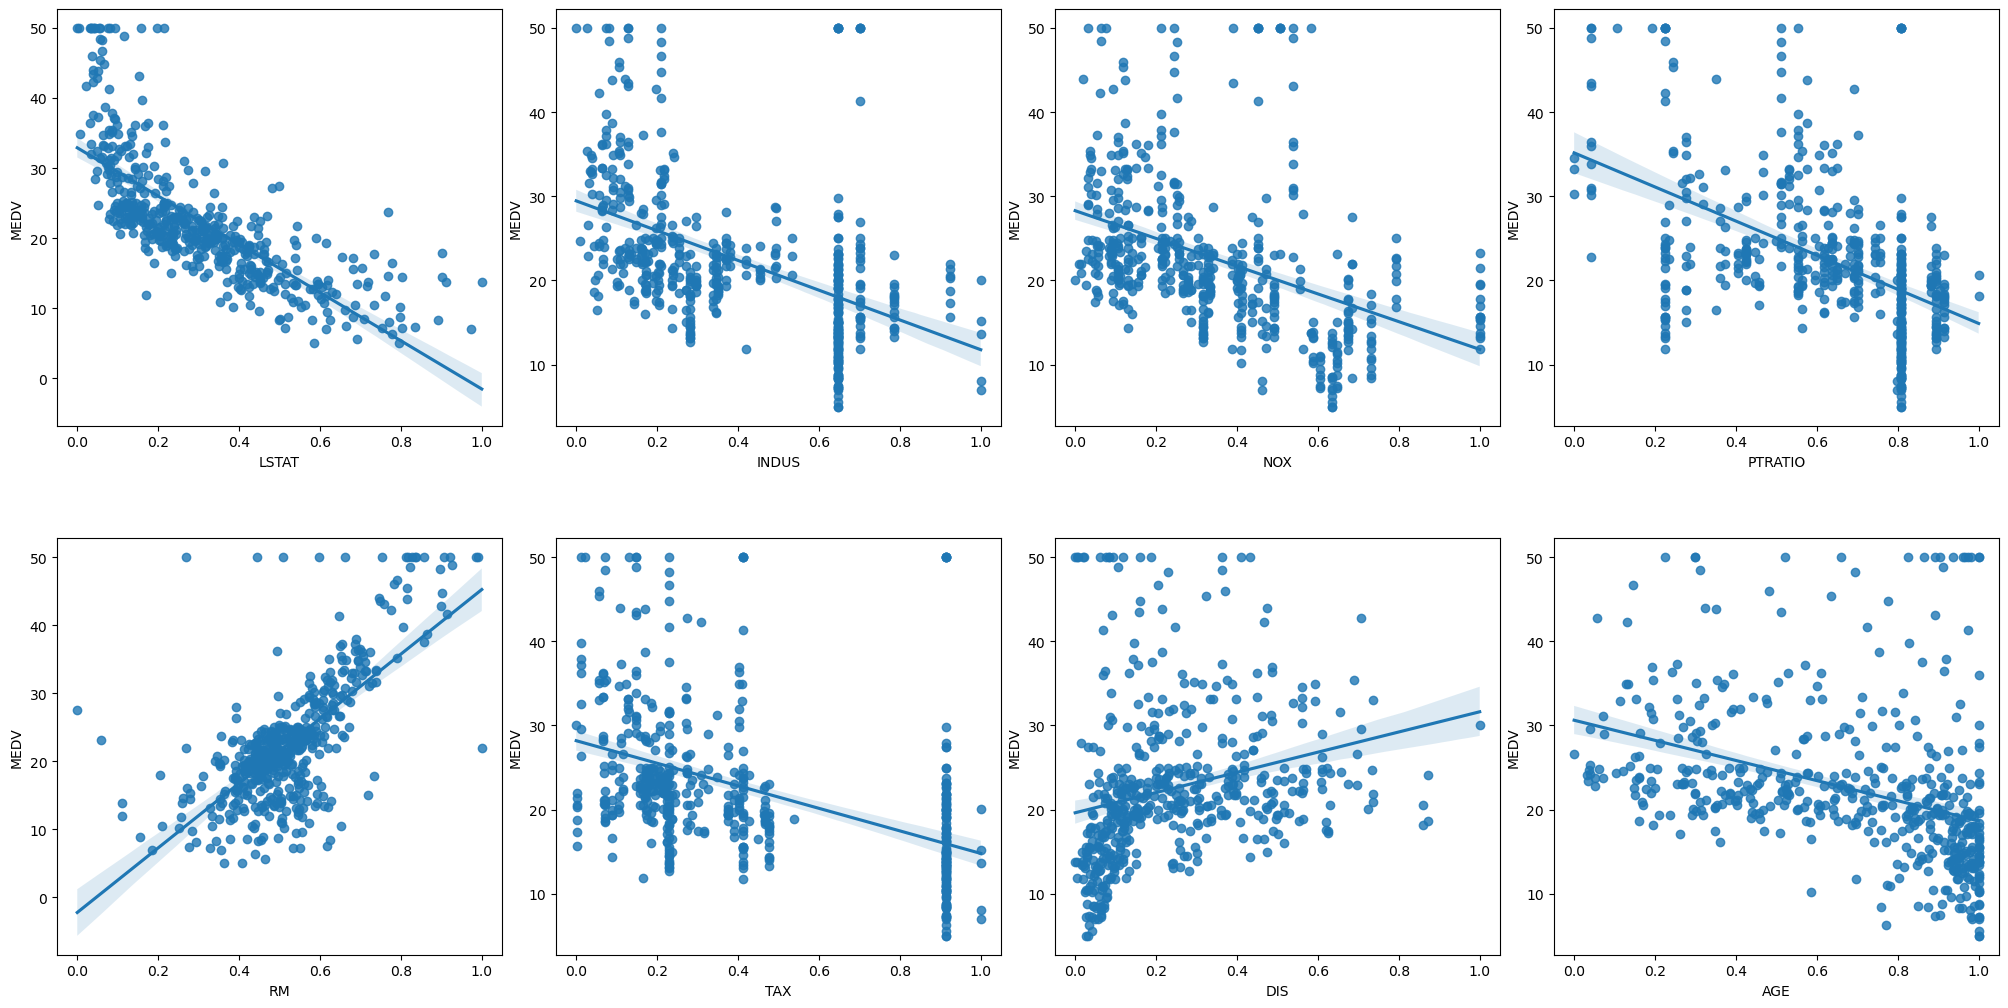

In [34]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to be scaled and used for plotting
columns_to_scale = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

# Create a DataFrame with the selected columns
X = df[columns_to_scale]
y = df['MEDV']

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Scale the selected columns
X = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=columns_to_scale)

# Create subplots for plotting
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
axs = axs.flatten()

# Iterate through the columns for plotting
for i, column in enumerate(columns_to_scale):
    sns.regplot(x=X[column], y=y, ax=axs[i])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('MEDV')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


In this analysis, there is a strong indication that the target values are skewed.

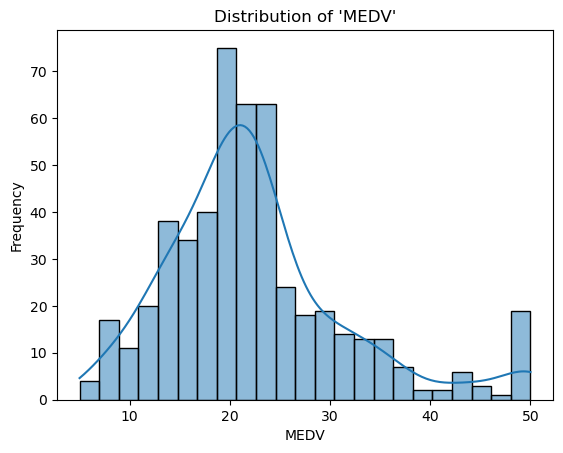

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram
sns.histplot(df['MEDV'], kde=True)
plt.title("Distribution of 'MEDV'")
plt.xlabel("MEDV")
plt.ylabel("Frequency")
plt.show()

The visualization suggests that the target value is skewed. For a more precise measure of skewness, we can perform a formal skewness calculation.

In [36]:
from scipy.stats import skew

# Calculate the skewness of the target variable
skewness = skew(df['MEDV'])
print(f"Skewness of 'MEDV': {skewness}")

Skewness of 'MEDV': 1.104810822864635


A skewness value of 1.1 for the target variable 'MEDV' indicates a positive skew, implying that the 'MEDV' distribution is right-skewed, with a tail extending to the higher values. This skewness suggests the presence of potential outliers with higher values in the data.

In [42]:
import numpy as np
from scipy.stats import skew

# Extract the feature variables (X) from the DataFrame, excluding the last column (:-1)
X = df.iloc[:, :-1].values

# Extract the target variable (y) from the last column of the DataFrame
y = df.iloc[:, -1].values

# Apply a logarithmic transformation to the target variable 'y'
y = np.log1p(y)
# This transformation helps reduce the impact of outliers and make the distribution of 'y' more symmetrical.

# Loop through each feature variable in 'X' to check for skewness and potentially transform them.
for col in range(X.shape[1]):
    # Calculate the absolute skewness of the current feature variable using scipy.stats.skew
    if np.abs(skew(X[:, col])) > 0.3:
        # If the absolute skewness is greater than 0.3, apply a logarithmic transformation to the variable.
        X[:, col] = np.log1p(X[:, col])
        # This transformation aims to reduce skewness and make the distribution of the feature variable more symmetrical,
        # which can improve the performance of machine learning models.


In [44]:
# Recompute the skewness of the target variable 'y'
y_skewness = skew(y)
print(f"Skewness of 'y' after transformation: {y_skewness}")

Skewness of 'y' after transformation: -0.24052778511563527


## Machine Learning Section

In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define the columns to be standardized
columns_to_standardize = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE', 'RAD']

# Define the columns to be retained (other columns)
columns_to_retain = ['CHAS', 'ZN', 'B', 'MEDV']  # Add your desired columns here

# Create a DataFrame with the selected columns
selected_data = df[columns_to_standardize + columns_to_retain]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns and transform the data
scaled_data = scaler.fit_transform(selected_data[columns_to_standardize])

# Create a new DataFrame with the scaled values
scaled_df = pd.DataFrame(data=scaled_data, columns=columns_to_standardize)

# Combine the standardized columns with the retained columns
final_data = pd.concat([scaled_df, selected_data[columns_to_retain]], axis=1)

# Display the final DataFrame
print("Final Data:")
print(final_data)

Final Data:
        LSTAT     INDUS       NOX   PTRATIO        RM       TAX       DIS  \
0   -1.075562 -1.287909 -0.144217 -1.459000  0.413672 -0.666608  0.140214   
1   -0.492439 -0.593381 -0.740262 -0.303094  0.194274 -0.987329  0.557160   
2   -1.208727 -0.593381 -0.740262 -0.303094  1.282714 -0.987329  0.557160   
3   -1.361517 -1.306878 -0.835284  0.113032  1.016303 -1.106115  1.077737   
4   -1.026501 -1.306878 -0.835284  0.113032  1.228577 -1.106115  1.077737   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.418147  0.115738  0.158124  1.176466  0.439316 -0.803212 -0.625796   
502 -0.500850  0.115738  0.158124  1.176466 -0.234548 -0.803212 -0.716639   
503 -0.983048  0.115738  0.158124  1.176466  0.984960 -0.803212 -0.773684   
504 -0.865302  0.115738  0.158124  1.176466  0.725672 -0.803212 -0.668437   
505 -0.669058  0.115738  0.158124  1.176466 -0.362767 -0.803212 -0.613246   

          AGE       RAD  CHAS    ZN       B  MEDV  
0   -0.1200

In [65]:
# Extract the feature variables (X) from the DataFrame, excluding the last column (:-1)
X = final_data.iloc[:, :-1].values

# Extract the target variable (y) from the last column of the DataFrame
y = final_data.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [66]:
print(X_train)

[[-1.37e+00 -1.12e+00 -1.02e+00 ...  0.00e+00  4.50e+01  3.90e+02]
 [ 1.21e+00  1.57e+00  5.99e-01 ...  0.00e+00  0.00e+00  3.92e+02]
 [-1.27e+00 -7.70e-01 -1.07e+00 ...  0.00e+00  2.20e+01  3.77e+02]
 ...
 [ 1.43e+00  1.02e+00  1.60e+00 ...  0.00e+00  0.00e+00  3.97e+02]
 [-4.22e-01 -1.03e+00 -3.86e-01 ...  0.00e+00  0.00e+00  3.93e+02]
 [ 7.40e-01  2.12e+00  2.27e-01 ...  0.00e+00  0.00e+00  3.78e+02]]


In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept =  True)
regressor.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[11.49 16.5 ]
 [26.81 24.8 ]
 [17.58 17.4 ]
 [17.88 19.3 ]
 [36.88 37.6 ]
 [25.61 24.2 ]
 [31.05 35.4 ]
 [18.87 19.9 ]
 [19.75 27.5 ]
 [23.21 17.  ]
 [28.43 31.2 ]
 [28.51 24.4 ]
 [19.13 16.1 ]
 [32.78 27.  ]
 [21.54 21.  ]
 [14.98 14.9 ]
 [21.2  18.9 ]
 [10.91  6.3 ]
 [13.1  16.3 ]
 [13.62 13.9 ]
 [12.62  8.8 ]
 [17.49 19.4 ]
 [20.71 18.8 ]
 [22.34 19.8 ]
 [16.72 17.5 ]
 [20.14 19.3 ]
 [17.68 20.  ]
 [14.15 14.3 ]
 [20.58 16.1 ]
 [17.1  19.5 ]
 [13.84 11.  ]
 [23.89 21.9 ]
 [34.11 31.  ]
 [22.25 22.  ]
 [16.25 15.1 ]
 [19.72 13.3 ]
 [30.87 28.7 ]
 [35.52 46.7 ]
 [23.49 22.2 ]
 [24.88 22.8 ]
 [36.96 42.3 ]
 [32.58 41.3 ]
 [19.1  16.7 ]
 [32.32 31.1 ]
 [33.29 26.7 ]
 [25.26 19.4 ]
 [40.5  50.  ]
 [18.11 16.6 ]
 [18.91 19.5 ]
 [23.83 24.4 ]
 [33.3  28.5 ]
 [26.33 22.3 ]
 [17.7  12.1 ]
 [28.46 28.6 ]
 [13.36 15.6 ]
 [23.2  19.2 ]
 [24.4  27.5 ]
 [33.58 32.  ]
 [16.78 20.2 ]
 [36.71 32.4 ]
 [15.7  18.4 ]
 [17.79 19.9 ]
 [32.03 29.8 ]
 [15.57 20.1 ]
 [39.04 43.5 ]
 [27.41 24.5 ]
 [31.75 50

In [74]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7232625062978679

## Ridge regression (L2 regularization)

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create polynomial features
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

# Create and fit a Ridge Regression model
alpha = 0.1
ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(X_train_poly, y_train)

# Predict using the trained model
y_pred = ridge_reg.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"r2_score: {r2}")


Mean Squared Error: 13.688921543250826
r2_score: 0.8526317595933609


## Lasso regularization (L1)


In [78]:
from sklearn.linear_model import Lasso
# Create and fit a Lasso Regression model
alpha = 0.01  
lasso_reg = Lasso(alpha=alpha)
lasso_reg.fit(X_train_poly, y_train)

# Predict using the trained model
y_pred = lasso_reg.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"r2_score: {r2}")


Mean Squared Error: 9.654322179843179
r2_score: 0.8960662848810216


/Users/mohamadrezasalehi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.770e+03, tolerance: 3.313e+00
  model = cd_fast.enet_coordinate_descent(
